In [11]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


%matplotlib inline

### Load Training Data

In [12]:
train_data = pd.read_csv('data.csv')

### 2 cities - São Gonçalo & Vitória

In [13]:
cities = pd.unique(train_data["city"])
print(cities)

['São Gonçalo' 'Vitória']


## São Gonçalo

In [14]:
train_data_Sao = train_data[train_data["city"] == cities[0]]
train_data_Sao.head()

,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,0,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,...,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,1,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,...,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,2,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,...,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,3,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,...,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,4,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,...,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


#### Data Analyzing

In [15]:
def basic_analyze(df):
    print(df.shape)

    analysis = pd.DataFrame(columns=['col_name', 'nulls', 'uniques', 'dtype'])
    for col in df:
        row = pd.Series({'col_name':col, 
                         'nulls':df[col].isnull().sum(), 
                         'uniques':df[col].unique().size,
                         'dtype':df[col].dtypes})
        analysis = analysis.append(row, ignore_index=True)

    pd.set_option('display.max_rows', 32)
    display(analysis)

In [16]:
train_data_Sao.describe()

,Unnamed: 0,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,78048.000000,78048.0,78048.0,78048.000000,7.804800e+04,78048.000000,78048.000000,78048.000000,78048.000000,12829.000000,...,78048.000000,78048.000000,78048.000000,78048.000000,78048.000000,78048.000000,78048.000000,67915.000000,78048.000000,75542.000000
mean,39023.500000,178.0,237.0,-6.835777,-3.831158e+01,2011.800738,6.481857,15.749692,11.500000,0.480131,...,24.248878,15.977461,22.803795,14.778907,51.916539,55.191651,48.456194,1.633900,110.233177,4.323069
std,22530.661242,0.0,0.0,0.000000,7.105473e-15,2.585033,3.446678,8.792424,6.922231,2.653633,...,10.500904,7.208224,9.896572,6.861464,28.306442,29.228312,27.265632,1.236523,71.847998,2.886458
min,0.000000,178.0,237.0,-6.835777,-3.831158e+01,2007.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19511.750000,178.0,237.0,-6.835777,-3.831158e+01,2010.000000,3.750000,8.000000,5.750000,0.000000,...,23.500000,14.600000,22.300000,12.900000,34.000000,38.000000,31.000000,0.500000,74.000000,2.000000
50%,39023.500000,178.0,237.0,-6.835777,-3.831158e+01,2012.000000,6.000000,16.000000,11.500000,0.000000,...,26.800000,18.200000,25.200000,16.800000,56.000000,60.000000,51.000000,1.600000,108.000000,4.400000
75%,58535.250000,178.0,237.0,-6.835777,-3.831158e+01,2014.000000,9.000000,23.000000,17.250000,0.000000,...,30.900000,20.900000,28.800000,19.600000,74.000000,79.000000,69.000000,2.500000,144.000000,6.500000
max,78047.000000,178.0,237.0,-6.835777,-3.831158e+01,2016.000000,12.000000,31.000000,23.000000,68.600000,...,39.300000,30.900000,38.000000,29.100000,100.000000,100.000000,100.000000,9.200000,360.000000,21.700000


In [17]:
basic_analyze(train_data_Sao)

(78048, 32)


,col_name,nulls,uniques,dtype
0,Unnamed: 0,0,78048,int64
1,wsid,0,1,int64
2,wsnm,0,1,object
3,elvt,0,1,int64
4,lat,0,1,float64
5,lon,0,1,float64
6,inme,0,1,object
7,city,0,1,object
8,prov,0,1,object
9,mdct,0,78048,object


#### Precipitation

##### Percentage of raining days

In [18]:
sum(train_data_Sao['prcp'] > 0) / len(train_data_Sao)

0.025894321443214432

In [19]:
train_data_Sao['prcp'].describe()

count    12829.000000
mean         0.480131
std          2.653633
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         68.600000
Name: prcp, dtype: float64

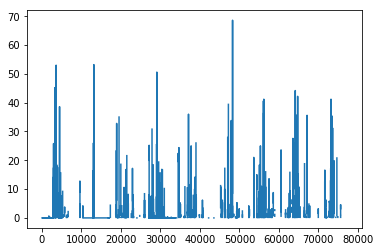

In [20]:
plt.plot(train_data_Sao['prcp'])

### Data Cleaning and Preprocessing

#### Drop useless data columns

In [21]:
def dropUselessColumns(df):
    drop_list = []
    for col in df.columns:
        uniques = df[col].unique().size
        if uniques == 1 or uniques == df.shape[0] or col in ['date', 'yr', 'mo', 'da', 'hr', 'index']:
            drop_list.append(col)
    
    return df.drop(drop_list, axis=1)

In [22]:
pd.set_option('display.max_columns', 30)
train_data_Sao = dropUselessColumns(train_data_Sao)
train_data_Sao.head()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


#### Fill blanks with zero

In [23]:
def fillBlankByZero(df):
    for col in df.columns:
        df[col].fillna(0, inplace=True)

In [24]:
fillBlankByZero(train_data_Sao)
train_data_Sao.head()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,0.0,982.5,982.5,981.3,0.0,29.3,12.1,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,0.0,983.2,983.2,982.5,0.0,29.0,13.5,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,0.0,983.5,983.5,983.2,0.0,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,0.0,983.7,983.7,983.4,0.0,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,0.0,983.7,983.8,983.6,0.0,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


#### Find outliers by z-score  (air pressure related fields, like 'stp', 'smax', 'smin' contain erroneous records)

In [25]:
def getOutlierIndices(df):
    df_zscore = (df - df.mean()) / df.std()
    outliers = set()
    outlier_col = []
    for col in ['stp', 'smax', 'smin']:
        if col == 'prcp':
            continue   
        ol = list(df_zscore[abs(df_zscore[col]) > 3].index)
        if len(ol) > 0:
            outlier_col.append((col, len(ol)))
        outliers.update(ol)
        
    print(outlier_col)
    print(len(outliers))
    return outliers

In [26]:
outliers_Sao = getOutlierIndices(train_data_Sao)
train_data_Sao.loc[sorted(outliers_Sao)].head()

[('stp', 468), ('smax', 734), ('smin', 643)]
1820


,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
74,0.0,982.7,4863.8,982.5,0.000,28.3,15.3,30.6,15.3,28.3,13.6,45,45,35,3.4,102,9.6
83,0.0,2514.0,985.2,984.8,1913.426,27.0,15.2,27.0,16.2,25.3,14.8,49,57,48,3.9,115,7.1
94,0.0,979.8,8384.4,979.0,0.000,25.6,15.5,26.5,18.0,25.1,14.9,54,63,51,1.5,124,2.9
159,0.0,983.7,985.0,8152.0,3710.546,33.4,12.1,33.4,14.2,31.5,11.0,27,35,26,3.6,99,7.9
163,0.0,980.5,5201.7,980.4,1570.529,34.9,11.7,35.5,13.0,34.8,10.3,25,26,22,1.5,78,6.4


#### Find rows with all zeros

In [27]:
def getAllZeroIndices(df):
    allZeros = list(df[~((df.T != 0).any())].index)
    print(len(allZeros))
    return allZeros

In [28]:
allZeros_Sao = getAllZeroIndices(train_data_Sao)
train_data_Sao.loc[allZeros_Sao].head()

10806


,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0


#### Integrate Rows to Remove

In [29]:
removals_Sao = set()
removals_Sao.update(outliers_Sao, allZeros_Sao)

#### Prepare X (Past 3 hours data), Y (Precipitation)

In [30]:
def prepareXYByKHours(data, k, removals):
    X_col_names = []
    for i in range(k, 0, -1):
        for col in data.columns:
            if col == 'prcp':
                continue
            X_col_names.append(col + "(<" + str(i) + "hr)")
    
    df_Y = pd.DataFrame(data=data.loc[k:]['prcp'] , columns=['prcp']).reset_index().drop(['index'], axis=1)
    df_X = pd.DataFrame()
    for start in range(k):
        df_X = pd.concat([df_X, data.iloc[start : -k + start, 1:].reset_index()], axis=1).drop(['index'], axis=1)
    df_X.columns = X_col_names
    
    # drop groups with outliers
    rms = set()
    for rm in list(removals):
        for r in range(max(0, rm - k + 1), min(df_X.shape[0], rm + 1)):
            rms.add(r)
    df_X = df_X.drop(list(rms))
    df_Y = df_Y.drop(list(rms))
        
    return df_X, df_Y

In [31]:
train_X_Sao, train_Y_Sao = prepareXYByKHours(train_data_Sao, 3, removals_Sao)
pd.set_option('display.max_columns', 48)
pd.set_option('display.max_rows', 15)
display(pd.concat([train_Y_Sao, train_X_Sao], axis=1))

,prcp,stp(<3hr),smax(<3hr),smin(<3hr),gbrd(<3hr),temp(<3hr),dewp(<3hr),tmax(<3hr),dmax(<3hr),tmin(<3hr),dmin(<3hr),hmdy(<3hr),hmax(<3hr),hmin(<3hr),wdsp(<3hr),wdct(<3hr),gust(<3hr),stp(<2hr),smax(<2hr),smin(<2hr),gbrd(<2hr),temp(<2hr),dewp(<2hr),tmax(<2hr),...,tmin(<2hr),dmin(<2hr),hmdy(<2hr),hmax(<2hr),hmin(<2hr),wdsp(<2hr),wdct(<2hr),gust(<2hr),stp(<1hr),smax(<1hr),smin(<1hr),gbrd(<1hr),temp(<1hr),dewp(<1hr),tmax(<1hr),dmax(<1hr),tmin(<1hr),dmin(<1hr),hmdy(<1hr),hmax(<1hr),hmin(<1hr),wdsp(<1hr),wdct(<1hr),gust(<1hr)
0,0.0,982.5,982.5,981.3,0.000,29.3,12.1,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5,983.2,983.2,982.5,0.000,29.0,13.5,29.9,...,29.0,12.2,39,39,35,3.6,94,6.4,983.5,983.5,983.2,0.000,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
1,0.0,983.2,983.2,982.5,0.000,29.0,13.5,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4,983.5,983.5,983.2,0.000,27.4,14.0,29.0,...,27.4,13.6,44,44,39,2.5,93,6.9,983.7,983.7,983.4,0.000,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
2,0.0,983.5,983.5,983.2,0.000,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9,983.7,983.7,983.4,0.000,25.8,16.9,27.4,...,25.8,14.1,58,58,44,1.7,96,5.8,983.7,983.8,983.6,0.000,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5
3,0.0,983.7,983.7,983.4,0.000,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8,983.7,983.8,983.6,0.000,25.4,16.4,26.3,...,25.3,16.4,57,58,56,3.1,110,7.5,983.7,983.8,983.6,0.000,23.8,16.2,25.4,16.4,23.8,16.0,62,62,57,2.0,99,6.8
4,0.0,983.7,983.8,983.6,0.000,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5,983.7,983.8,983.6,0.000,23.8,16.2,25.4,...,23.8,16.0,62,62,57,2.0,99,6.8,983.7,983.7,983.6,0.000,22.0,16.7,23.8,16.7,22.0,16.2,72,72,62,1.3,93,4.9
5,0.0,983.7,983.8,983.6,0.000,23.8,16.2,25.4,16.4,23.8,16.0,62,62,57,2.0,99,6.8,983.7,983.7,983.6,0.000,22.0,16.7,23.8,...,22.0,16.2,72,72,62,1.3,93,4.9,984.6,984.6,983.7,0.000,19.7,17.4,22.0,17.8,19.5,16.6,86,89,72,0.5,157,2.8
6,0.0,983.7,983.7,983.6,0.000,22.0,16.7,23.8,16.7,22.0,16.2,72,72,62,1.3,93,4.9,984.6,984.6,983.7,0.000,19.7,17.4,22.0,...,19.5,16.6,86,89,72,0.5,157,2.8,985.7,985.7,984.6,0.000,18.3,17.3,19.7,17.3,18.3,16.9,93,94,85,0.0,141,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78038,0.0,986.9,988.0,986.9,3389.313,31.4,13.3,32.1,15.1,29.7,13.2,33,41,33,4.7,98,10.4,985.7,986.9,985.7,3025.471,33.1,13.1,33.2,...,31.4,12.2,30,33,29,4.4,103,9.5,984.2,985.7,984.2,3531.766,34.3,11.7,34.7,13.3,32.5,10.8,25,31,24,4.4,75,10.3
78039,0.0,985.7,986.9,985.7,3025.471,33.1,13.1,33.2,13.8,31.4,12.2,30,33,29,4.4,103,9.5,984.2,985.7,984.2,3531.766,34.3,11.7,34.7,...,32.5,10.8,25,31,24,4.4,75,10.3,982.9,984.3,982.9,3078.407,35.2,11.1,35.3,12.1,33.7,10.8,23,26,23,4.1,87,8.8


### Train models (logistic regression + linear regression)

In [95]:
def predictByKHours(data, k, removals):
    data_X, data_Y = prepareXYByKHours(data, k, removals)
    raining_idx = data_Y['prcp'] > 0
    
    #### A logistic regression model that predicts whether it will rain in the next hour
    logistic = LogisticRegression()
    scores = cross_val_score(logistic, data_X, raining_idx, cv=5)
    print("Logistic Regression: 5-fold Cross-Validation: Mean Accuracy: %f" % (scores.mean()))
    
    #### A linear regression model predicting how much it will rain
    linear = LinearRegression()
    scores = -cross_val_score(linear, data_X[raining_idx], data_Y[raining_idx], cv=5, scoring='neg_mean_squared_error')
    print("Linear Regression: 5-fold Cross-Validation: MSE: %f" % (scores.mean()))


### Predict by 3, 5, 10, 15 previous hours

In [96]:
%%time 

predictByKHours(train_data_Sao, 3, removals_Sao)

Logistic Regression: 5-fold Cross-Validation: Mean Accuracy: 0.959603
Linear Regression: 5-fold Cross-Validation: MSE: 44.560339
CPU times: user 32 s, sys: 713 ms, total: 32.7 s
Wall time: 31.1 s


In [98]:
%%time 

predictByKHours(train_data_Sao, 5, removals_Sao)

Logistic Regression: 5-fold Cross-Validation: Mean Accuracy: 0.957415
Linear Regression: 5-fold Cross-Validation: MSE: 48.917910
CPU times: user 1min 34s, sys: 1.23 s, total: 1min 35s
Wall time: 1min 33s


In [97]:
%%time 

predictByKHours(train_data_Sao, 10, removals_Sao)

Logistic Regression: 5-fold Cross-Validation: Mean Accuracy: 0.956746
Linear Regression: 5-fold Cross-Validation: MSE: 57.201673
CPU times: user 3min 8s, sys: 2.88 s, total: 3min 11s
Wall time: 3min 9s


In [99]:
%%time 

predictByKHours(train_data_Sao, 15, removals_Sao)

Logistic Regression: 5-fold Cross-Validation: Mean Accuracy: 0.956503
Linear Regression: 5-fold Cross-Validation: MSE: 84.655129
CPU times: user 4min 18s, sys: 4.15 s, total: 4min 22s
Wall time: 4min 19s


## Vitória

In [32]:
train_data_Vic = train_data[train_data["city"] == cities[1]].reset_index()
train_data_Vic.head()

,index,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,78048,78048,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2006-10-31 00:00:00,2006-10-31,2006,10,31,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
1,78049,78049,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2006-10-31 01:00:00,2006-10-31,2006,10,31,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
2,78050,78050,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2006-10-31 02:00:00,2006-10-31,2006,10,31,2,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
3,78051,78051,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2006-10-31 03:00:00,2006-10-31,2006,10,31,3,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
4,78052,78052,303,VITÓRIA,9,-20.271094,-40.306069,A612,Vitória,ES,2006-10-31 04:00:00,2006-10-31,2006,10,31,4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0


In [33]:
train_data_Vic.describe()

,index,Unnamed: 0,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,86952.00000,86952.00000,86952.0,86952.0,86952.000000,8.695200e+04,86952.000000,86952.000000,86952.000000,86952.000000,8103.000000,86952.000000,86952.000000,86952.000000,50416.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000
mean,121523.50000,121523.50000,303.0,9.0,-20.271094,-4.030607e+01,2011.292023,6.493514,15.733370,11.500000,1.790102,1022.400123,1089.931542,1077.128025,1281.749094,23.988459,19.261519,24.520054,19.712706,23.486470,18.823855,75.508660,77.987913,72.890986,1.870035,183.183711,5.143639
std,25101.02464,25101.02464,0.0,0.0,0.000000,1.421094e-14,2.877640,3.448533,8.802078,6.922226,3.778580,225.430176,918.239923,882.490618,1141.530122,4.526595,3.231869,4.675080,3.221859,4.389022,3.262563,16.944175,16.152887,17.638974,1.116863,124.045773,2.730668
min,78048.00000,78048.00000,303.0,9.0,-20.271094,-4.030607e+01,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99785.75000,99785.75000,303.0,9.0,-20.271094,-4.030607e+01,2009.000000,4.000000,8.000000,5.750000,0.200000,1012.900000,1013.100000,1012.600000,173.210000,21.700000,17.800000,22.100000,18.300000,21.300000,17.300000,65.000000,68.000000,61.000000,1.000000,50.000000,2.800000
50%,121523.50000,121523.50000,303.0,9.0,-20.271094,-4.030607e+01,2011.000000,6.000000,16.000000,11.500000,0.400000,1015.600000,1015.800000,1015.300000,1054.198000,24.100000,19.800000,24.600000,20.300000,23.600000,19.300000,78.000000,80.000000,75.000000,1.700000,188.000000,5.000000
75%,143261.25000,143261.25000,303.0,9.0,-20.271094,-4.030607e+01,2014.000000,9.000000,23.000000,17.250000,1.800000,1019.000000,1019.200000,1018.700000,2191.446000,26.600000,21.400000,27.300000,21.800000,26.100000,21.000000,90.000000,92.000000,88.000000,2.600000,310.000000,7.100000
max,164999.00000,164999.00000,303.0,9.0,-20.271094,-4.030607e+01,2016.000000,12.000000,31.000000,23.000000,70.200000,8766.700000,34673.300000,43396.200000,4146.547000,37.200000,25.900000,38.700000,26.900000,36.700000,25.700000,100.000000,100.000000,100.000000,19.100000,360.000000,22.700000


In [34]:
basic_analyze(train_data_Vic)

(86952, 33)


,col_name,nulls,uniques,dtype
0,index,0,86952,int64
1,Unnamed: 0,0,86952,int64
2,wsid,0,1,int64
3,wsnm,0,1,object
4,elvt,0,1,int64
5,lat,0,1,float64
6,lon,0,1,float64
7,inme,0,1,object
8,city,0,1,object
9,prov,0,1,object


In [35]:
sum(train_data_Vic['prcp'] > 0) / len(train_data_Vic)

0.08137823166804674

In [36]:
train_data_Vic['prcp'].describe()

count    8103.000000
mean        1.790102
std         3.778580
min         0.000000
25%         0.200000
50%         0.400000
75%         1.800000
max        70.200000
Name: prcp, dtype: float64

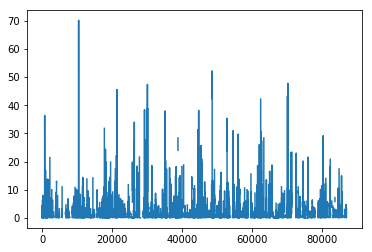

In [39]:
plt.plot(train_data_Vic['prcp'])

In [40]:
pd.set_option('display.max_columns', 30)
train_data_Vic = dropUselessColumns(train_data_Vic)
train_data_Vic.head()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
2,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
3,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0


In [126]:
fillBlankByZero(train_data_Vic)
train_data_Vic.head()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0


In [127]:
outliers_Vic = getOutlierIndices(train_data_Vic)
train_data_Vic.loc[sorted(outliers_Vic)].head()

[('stp', 1846), ('smax', 844), ('smin', 747)]
3412


,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0


In [128]:
allZeros_Vic = getAllZeroIndices(train_data_Vic)
train_data_Vic.loc[allZeros_Vic].head()

1027


,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0


In [129]:
removals_Vic = set()
removals_Vic.update(outliers_Vic, allZeros_Vic)

In [130]:
%%time 

predictByKHours(train_data_Vic, 3, removals_Vic)

Logistic Regression: 5-fold Cross-Validation: Mean Accuracy: 0.924205
Linear Regression: 5-fold Cross-Validation: MSE: 14.739102
CPU times: user 44.4 s, sys: 903 ms, total: 45.3 s
Wall time: 43.5 s


In [131]:
%%time 

predictByKHours(train_data_Vic, 5, removals_Vic)

Logistic Regression: 5-fold Cross-Validation: Mean Accuracy: 0.922965
Linear Regression: 5-fold Cross-Validation: MSE: 15.011293
CPU times: user 1min 35s, sys: 1.36 s, total: 1min 37s
Wall time: 1min 34s


In [132]:
%%time 

predictByKHours(train_data_Vic, 10, removals_Vic)

Logistic Regression: 5-fold Cross-Validation: Mean Accuracy: 0.922988
Linear Regression: 5-fold Cross-Validation: MSE: 14.862421
CPU times: user 3min 13s, sys: 2.8 s, total: 3min 16s
Wall time: 3min 12s


In [133]:
%%time 

predictByKHours(train_data_Vic, 15, removals_Vic)

Logistic Regression: 5-fold Cross-Validation: Mean Accuracy: 0.923181
Linear Regression: 5-fold Cross-Validation: MSE: 16.238331
CPU times: user 4min 53s, sys: 4.5 s, total: 4min 57s
Wall time: 4min 53s
